# **Final Project Kecerdasan Komputasional**
- 5054231009: Rafif Fawwaz Kartika
- 5054231012: Ahnaf Tsabit Attaqi
- 5054231015: Dimas Ahmad Satrio Wicaksono
- 5054231022: Naufal Humam Maulana

## **Fitur dalam Dataset:**

1. **Informasi Pribadi:**
   - **School**: Sekolah siswa  
     - 'GP' = Gabriel Pereira  
     - 'MS' = Mousinho da Silveira  
   - **Sex**: Jenis kelamin siswa  
     - 'F' = Perempuan  
     - 'M' = Laki-laki  
   - **Age**: Usia siswa (15 hingga 22 tahun)  
   - **Address**: Jenis tempat tinggal  
     - 'U' = Urban (perkotaan)  
     - 'R' = Rural (pedesaan)  
   - **Famsize**: Ukuran keluarga  
     - 'LE3' = ≤ 3 anggota  
     - 'GT3' = > 3 anggota  
   - **Pstatus**: Status tinggal orang tua  
     - 'T' = Tinggal bersama  
     - 'A' = Terpisah  

2. **Pendidikan Orang Tua:**
   - **Medu**: Pendidikan ibu  
     - 0 = Tidak ada  
     - 1 = SD (kelas 1-4)  
     - 2 = SMP (kelas 5-9)  
     - 3 = SMA  
     - 4 = Perguruan tinggi  
   - **Fedu**: Pendidikan ayah
     - 0 = Tidak ada  
     - 1 = SD (kelas 1-4)  
     - 2 = SMP (kelas 5-9)  
     - 3 = SMA  
     - 4 = Perguruan tinggi  

3. **Pekerjaan Orang Tua:**
   - **Mjob**: Pekerjaan ibu  
     - 'teacher' = Guru  
     - 'health' = Bidang kesehatan  
     - 'services' = Pekerjaan sipil (administrasi/polisi)  
     - 'at_home' = Ibu rumah tangga  
     - 'other' = Pekerjaan lain  
   - **Fjob**: Pekerjaan ayah
     - 'teacher' = Guru  
     - 'health' = Bidang kesehatan  
     - 'services' = Pekerjaan sipil (administrasi/polisi)  
     - 'at_home' = Ibu rumah tangga  
     - 'other' = Pekerjaan lain  

4. **Alasan dan Pengasuhan:**
   - **Reason**: Alasan memilih sekolah  
     - 'home' = Dekat rumah  
     - 'reputation' = Reputasi sekolah  
     - 'course' = Program studi  
     - 'other' = Alasan lain  
   - **Guardian**: Wali siswa  
     - 'mother' = Ibu  
     - 'father' = Ayah  
     - 'other' = Wali lain  

5. **Waktu dan Kebiasaan Belajar:**
   - **Traveltime**: Waktu tempuh rumah ke sekolah  
     - 1 = <15 menit  
     - 2 = 15–30 menit  
     - 3 = 30 menit–1 jam  
     - 4 = >1 jam  
   - **Studytime**: Waktu belajar mingguan  
     - 1 = <2 jam  
     - 2 = 2–5 jam  
     - 3 = 5–10 jam  
     - 4 = >10 jam  
   - **Failures**: Jumlah kegagalan kelas sebelumnya  
     - Angka antara 1 hingga 3, atau 4 jika lebih dari 3 kali gagal  

6. **Dukungan Pendidikan:**
   - **Schoolsup**: Dukungan tambahan dari sekolah (ya/tidak)  
   - **Famsup**: Dukungan tambahan dari keluarga (ya/tidak)  
   - **Paid**: Kelas tambahan berbayar untuk mata pelajaran tertentu (ya/tidak)  
   - **Activities**: Mengikuti kegiatan ekstrakurikuler (ya/tidak)  
   - **Nursery**: Pernah bersekolah di taman kanak-kanak (ya/tidak)  
   - **Higher**: Ingin melanjutkan ke perguruan tinggi (ya/tidak)  
   - **Internet**: Memiliki akses internet di rumah (ya/tidak)  
   - **Romantic**: Sedang dalam hubungan romantis (ya/tidak)  

7. **Kehidupan dan Aktivitas Harian:**
   - **Famrel**: Kualitas hubungan keluarga (1 = sangat buruk hingga 5 = sangat baik)  
   - **Freetime**: Waktu luang setelah sekolah (1 = sangat rendah hingga 5 = sangat tinggi)  
   - **Goout**: Frekuensi keluar bersama teman (1 = sangat jarang hingga 5 = sangat sering)  
   - **Dalc**: Konsumsi alkohol di hari kerja (1 = sangat rendah hingga 5 = sangat tinggi)  
   - **Walc**: Konsumsi alkohol di akhir pekan (1 = sangat rendah hingga 5 = sangat tinggi)  
   - **Health**: Kondisi kesehatan saat ini (1 = sangat buruk hingga 5 = sangat baik)  
   - **Absences**: Jumlah absensi (0 hingga 93)  

8. **Nilai Akademik (Tujuan Akhir):**
   - **G1**: Nilai pada periode pertama (0–20)  
   - **G2**: Nilai pada periode kedua (0–20)  
   - **G3**: Nilai akhir (0–20, target output)  

In [365]:
!pip install scikit-fuzzy

In [366]:
import os
import pandas as pd
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [367]:
os.listdir('/kaggle/input/student-alcohol-consumption')

['student-mat.csv', 'student-merge.R', 'student-por.csv']

In [368]:
data1 = pd.read_csv('/kaggle/input/student-alcohol-consumption/student-mat.csv')
data2 = pd.read_csv('/kaggle/input/student-alcohol-consumption/student-por.csv')

In [369]:
data = pd.concat([data1, data2], axis=0, ignore_index=True)

In [370]:
duplicated = data.duplicated().sum()
print(duplicated)

0


In [371]:
data.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [372]:
data.shape

(1044, 33)

In [373]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

In [374]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1044.0,16.726054,1.239975,15.0,16.0,17.0,18.0,22.0
Medu,1044.0,2.603448,1.124907,0.0,2.0,3.0,4.0,4.0
Fedu,1044.0,2.387931,1.099938,0.0,1.0,2.0,3.0,4.0
traveltime,1044.0,1.522989,0.731727,1.0,1.0,1.0,2.0,4.0
studytime,1044.0,1.970307,0.834353,1.0,1.0,2.0,2.0,4.0
failures,1044.0,0.264368,0.656142,0.0,0.0,0.0,0.0,3.0
famrel,1044.0,3.935824,0.933401,1.0,4.0,4.0,5.0,5.0
freetime,1044.0,3.201149,1.031507,1.0,3.0,3.0,4.0,5.0
goout,1044.0,3.156130,1.152575,1.0,2.0,3.0,4.0,5.0
Dalc,1044.0,1.494253,0.911714,1.0,1.0,1.0,2.0,5.0


In [375]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [376]:
cat_cols = data.select_dtypes(include=['object']).columns.tolist()
num_cols = data.select_dtypes(exclude=['object']).columns.tolist()

print("Categorical Variables: \n", cat_cols, "\n")
print("Numerical Variables: \n", num_cols, "\n")

Categorical Variables: 
 ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic'] 

Numerical Variables: 
 ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3'] 



In [377]:
data.nunique()

school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      35
G1            18
G2            17
G3            19
dtype: int64

In [378]:
for i in data.columns:
    if (data[i].nunique() < 50):
        print ("Feature:\t", i, "\n", data[i].unique(), "\n")

Feature:	 school 
 ['GP' 'MS'] 

Feature:	 sex 
 ['F' 'M'] 

Feature:	 age 
 [18 17 15 16 19 22 20 21] 

Feature:	 address 
 ['U' 'R'] 

Feature:	 famsize 
 ['GT3' 'LE3'] 

Feature:	 Pstatus 
 ['A' 'T'] 

Feature:	 Medu 
 [4 1 3 2 0] 

Feature:	 Fedu 
 [4 1 2 3 0] 

Feature:	 Mjob 
 ['at_home' 'health' 'other' 'services' 'teacher'] 

Feature:	 Fjob 
 ['teacher' 'other' 'services' 'health' 'at_home'] 

Feature:	 reason 
 ['course' 'other' 'home' 'reputation'] 

Feature:	 guardian 
 ['mother' 'father' 'other'] 

Feature:	 traveltime 
 [2 1 3 4] 

Feature:	 studytime 
 [2 3 1 4] 

Feature:	 failures 
 [0 3 2 1] 

Feature:	 schoolsup 
 ['yes' 'no'] 

Feature:	 famsup 
 ['no' 'yes'] 

Feature:	 paid 
 ['no' 'yes'] 

Feature:	 activities 
 ['no' 'yes'] 

Feature:	 nursery 
 ['yes' 'no'] 

Feature:	 higher 
 ['yes' 'no'] 

Feature:	 internet 
 ['no' 'yes'] 

Feature:	 romantic 
 ['no' 'yes'] 

Feature:	 famrel 
 [4 5 3 1 2] 

Feature:	 freetime 
 [3 2 4 1 5] 

Feature:	 goout 
 [4 3 2 1 5] 



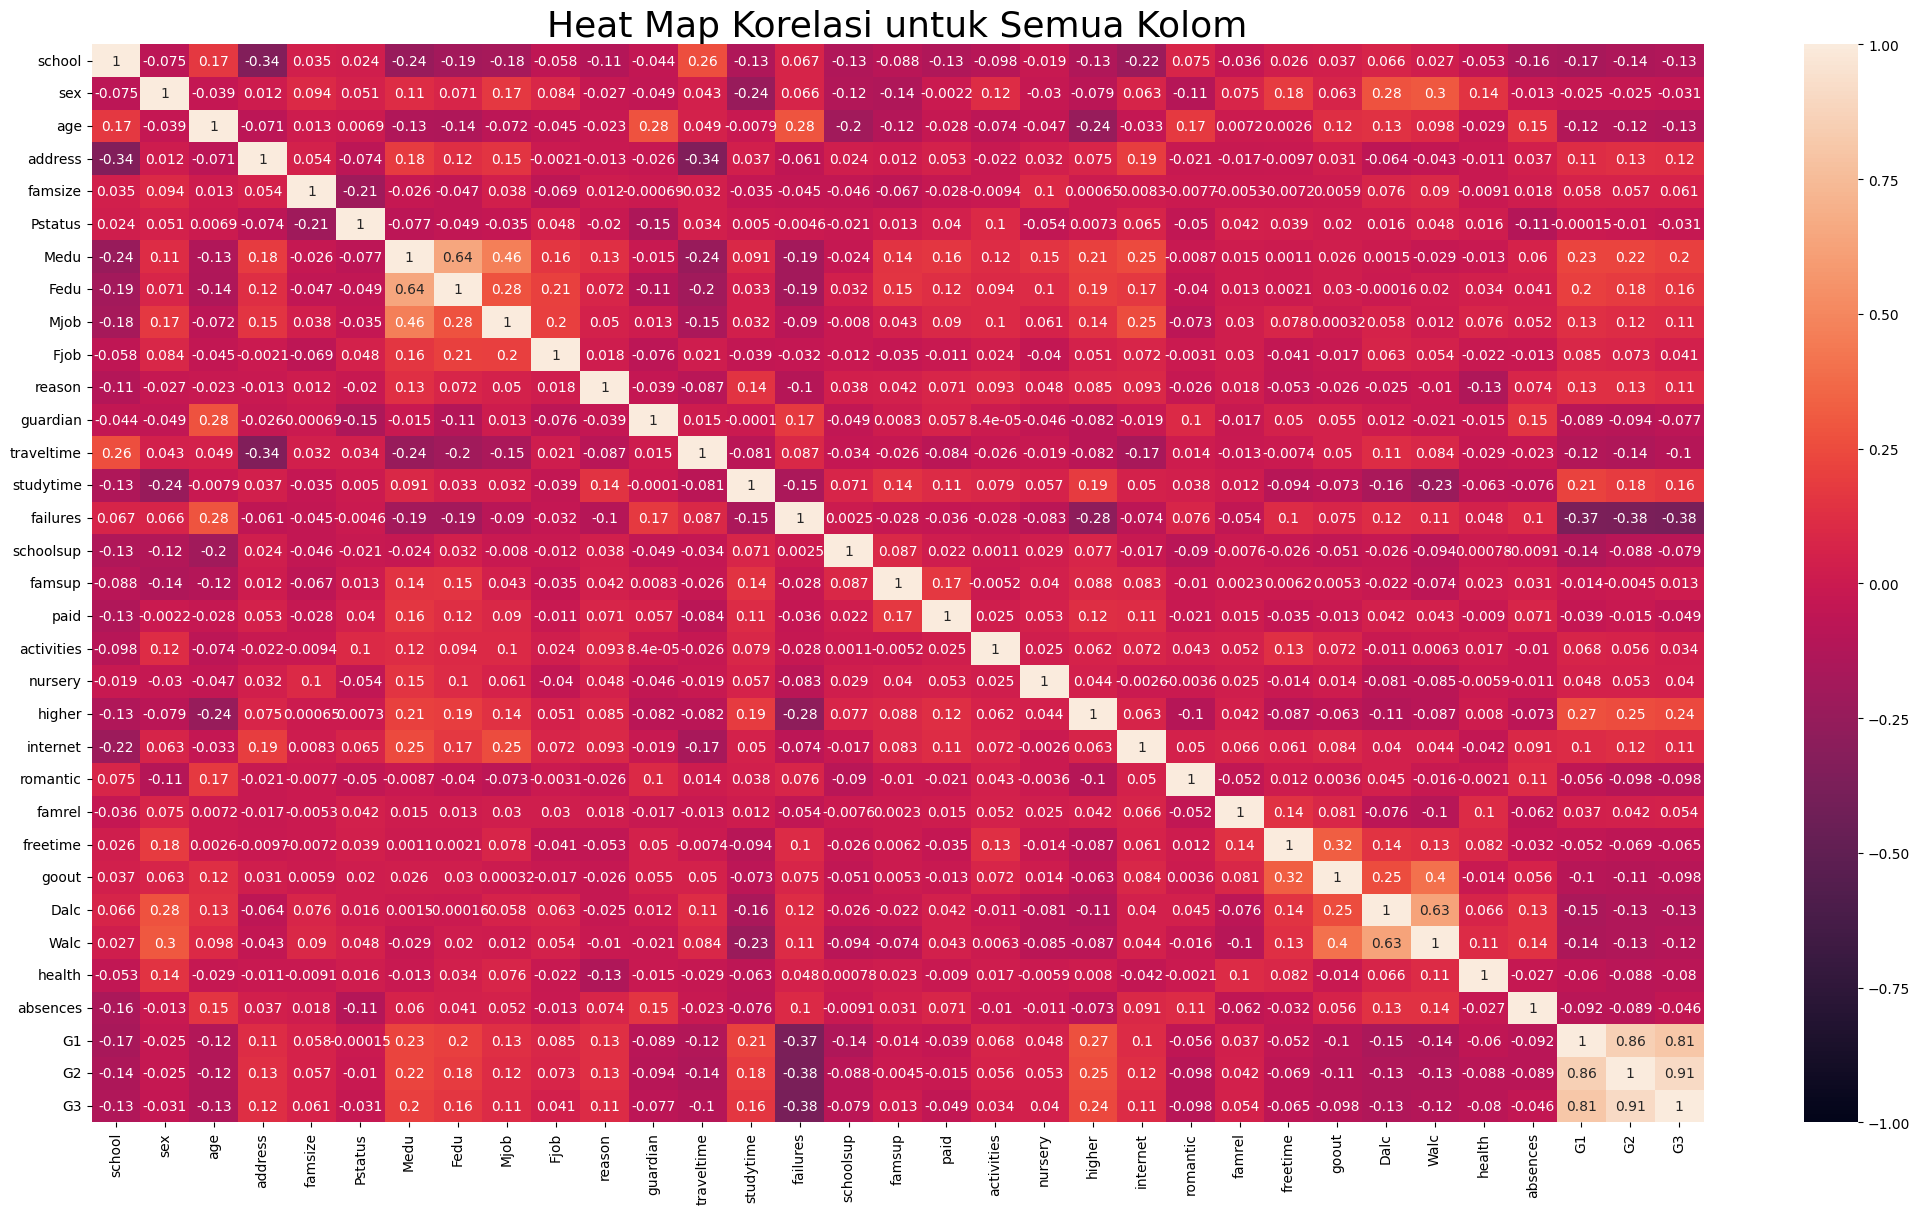

In [379]:
# Heat Map
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le

correlation_matrix = data.corr()

plt.figure(figsize=(26, 14))
sns.heatmap(correlation_matrix, annot = True, vmin = -1, vmax = 1)
plt.title(f'Heat Map Korelasi untuk Semua Kolom', fontsize=26)
plt.show()

In [380]:
target_corr = correlation_matrix['G3'].sort_values(ascending=False)
target_corr

G3            1.000000
G2            0.910743
G1            0.809142
higher        0.236578
Medu          0.201472
studytime     0.161629
Fedu          0.159796
address       0.117696
reason        0.108671
internet      0.107064
Mjob          0.105640
famsize       0.061209
famrel        0.054461
Fjob          0.040541
nursery       0.039950
activities    0.033998
famsup        0.013313
Pstatus      -0.030693
sex          -0.031472
absences     -0.045671
paid         -0.049388
freetime     -0.064890
guardian     -0.077320
schoolsup    -0.079346
health       -0.080079
goout        -0.097877
romantic     -0.098363
traveltime   -0.102627
Walc         -0.115740
age          -0.125282
school       -0.127114
Dalc         -0.129642
failures     -0.383145
Name: G3, dtype: float64

In [381]:
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [382]:
# Pilih fitur input dan target
features = ['G2', 'Medu', 'studytime', 'Dalc']
target = 'G3'

X = data[features].values
Y = data[target].values

In [383]:
# Pisahkan data menjadi data train dan data test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# **Fuzzy Logic (Metode Sugeno)**

### **Variabel Input Fuzzy**

#### 1. **`G2` (Nilai Ujian Kedua):**
   - Rendah (0–10)
   - Sedang (11–15)
   - Tinggi (16–20)

#### 2. **`Medu` (Pendidikan Ibu):**
   - Rendah (0–1)
   - Sedang (2–3)
   - Tinggi (4)

#### 3. **`studytime` (Waktu Belajar Mingguan):**
   - Rendah (1 jam)
   - Sedang (2–3 jam)
   - Tinggi (4 jam)

#### 4. **`Dalc` (Konsumsi Alkohol Harian):**
   - Rendah (1–2)
   - Sedang (3)
   - Tinggi (4–5)

### **Variabel Output Fuzzy**

#### **`G3` (Nilai Akhir):**
   - Rendah (0–10)
   - Sedang (11–15)
   - Tinggi (16–20)

In [384]:
# Definisikan range untuk setiap variabel input dan output
x_G2 = np.arange(0, 21, 1)          # Nilai ujian kedua (0-20)
x_Medu = np.arange(0, 5, 0.1)       # Pendidikan ibu (0-4)
x_studytime = np.arange(1, 5, 0.1)  # Waktu belajar mingguan (1-4)
x_Dalc = np.arange(1, 6, 0.1)       # Konsumsi alkohol harian (1-5)
x_G3 = np.arange(0, 21, 1)          # Nilai akhir (0-20)

In [385]:
# Fungsi keanggotaan untuk G2 (Nilai Ujian Kedua)
G2_low = fuzz.gaussmf(x_G3, 5, 3)
G2_medium = fuzz.gaussmf(x_G3, 10, 3)
G2_high = fuzz.gaussmf(x_G3, 15, 3)

# Fungsi keanggotaan untuk Medu (Pendidikan Ibu)
Medu_low = fuzz.trapmf(x_Medu, [0, 0, 1, 2])
Medu_medium = fuzz.trapmf(x_Medu, [1.5, 2, 3, 3.5])
Medu_high = fuzz.trapmf(x_Medu, [3, 4, 4, 4])     

# Fungsi keanggotaan untuk studytime (Waktu Belajar Mingguan)
studytime_low = fuzz.trimf(x_studytime, [1, 1, 2])
studytime_medium = fuzz.trimf(x_studytime, [1.5, 2.5, 3.5])
studytime_high = fuzz.trimf(x_studytime, [3, 4, 4])

# Fungsi keanggotaan untuk Dalc (Konsumsi Alkohol Harian)
Dalc_low = fuzz.trapmf(x_Dalc, [1, 1, 2, 2.5])
Dalc_medium = fuzz.trapmf(x_Dalc, [2, 3, 3, 4])
Dalc_high = fuzz.trapmf(x_Dalc, [3.5, 4, 5, 5])

# Fungsi keanggotaan untuk G3 (Nilai Akhir)
G3_low = fuzz.gaussmf(x_G3, 5, 3)
G3_medium = fuzz.gaussmf(x_G3, 10, 3)
G3_high = fuzz.gaussmf(x_G3, 15, 3)

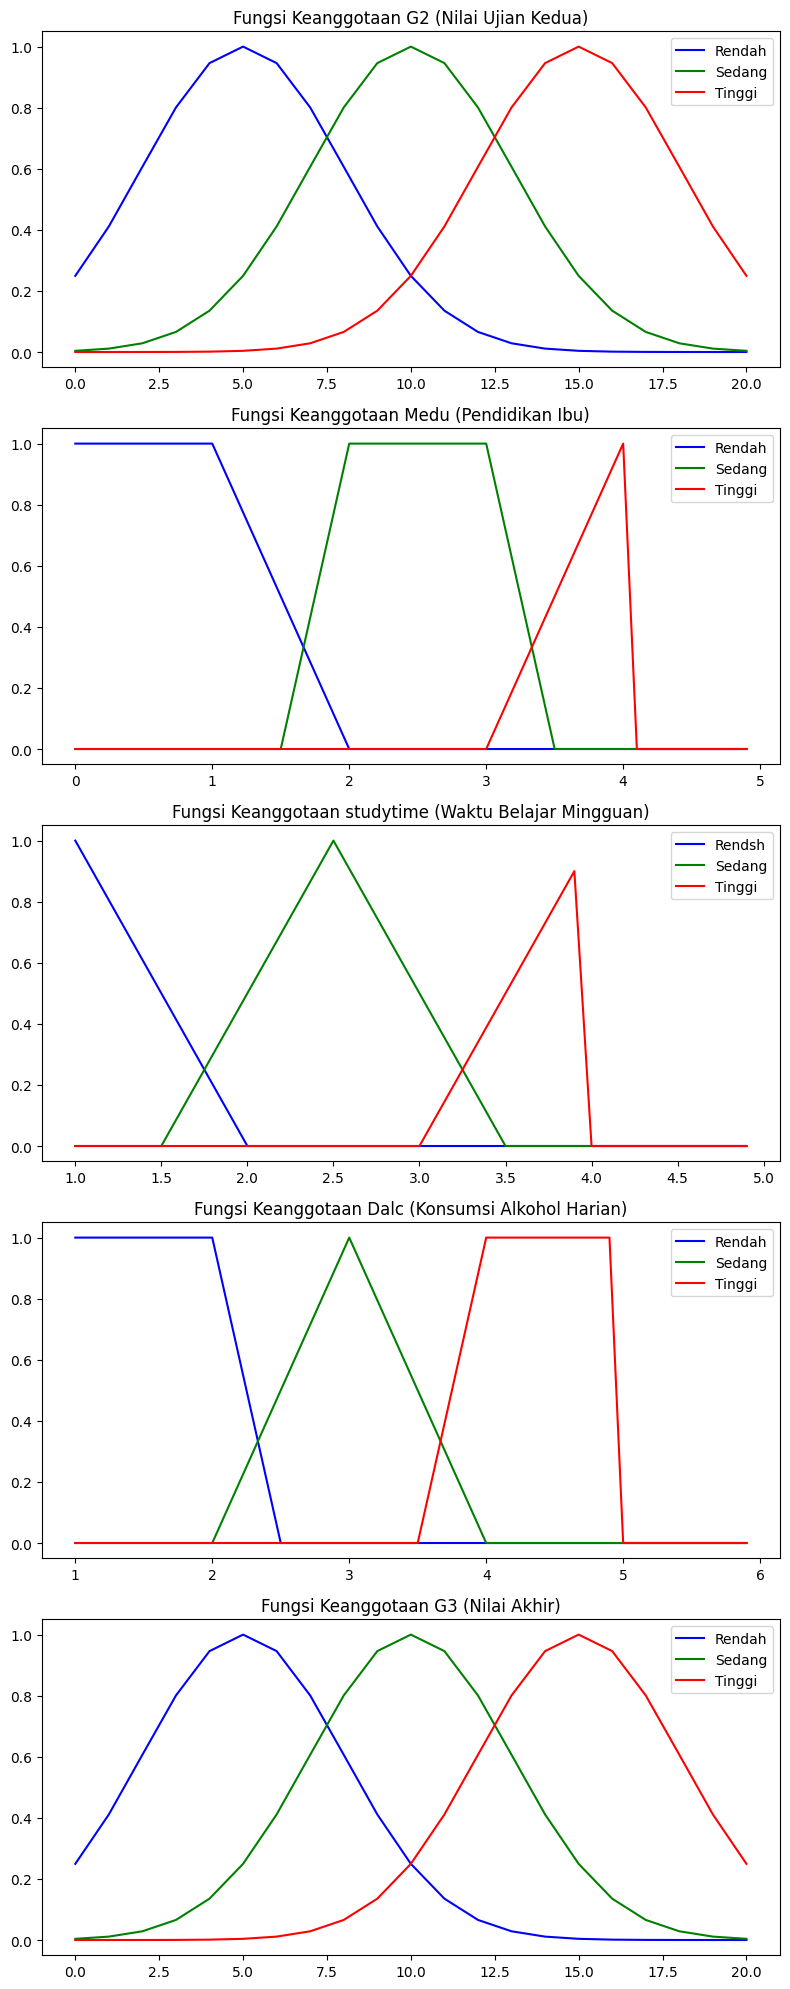

In [386]:
# Plot fungsi keanggotaan
fig, axes = plt.subplots(5, 1, figsize=(8, 20))

# Plot G2
axes[0].plot(x_G2, G2_low, 'b', label='Rendah')
axes[0].plot(x_G2, G2_medium, 'g', label='Sedang')
axes[0].plot(x_G2, G2_high, 'r', label='Tinggi')
axes[0].set_title('Fungsi Keanggotaan G2 (Nilai Ujian Kedua)')
axes[0].legend()

# Plot Medu
axes[1].plot(x_Medu, Medu_low, 'b', label='Rendah')
axes[1].plot(x_Medu, Medu_medium, 'g', label='Sedang')
axes[1].plot(x_Medu, Medu_high, 'r', label='Tinggi')
axes[1].set_title('Fungsi Keanggotaan Medu (Pendidikan Ibu)')
axes[1].legend()

# Plot studytime
axes[2].plot(x_studytime, studytime_low, 'b', label='Rendsh')
axes[2].plot(x_studytime, studytime_medium, 'g', label='Sedang')
axes[2].plot(x_studytime, studytime_high, 'r', label='Tinggi')
axes[2].set_title('Fungsi Keanggotaan studytime (Waktu Belajar Mingguan)')
axes[2].legend()

# Plot Dalc
axes[3].plot(x_Dalc, Dalc_low, 'b', label='Rendah')
axes[3].plot(x_Dalc, Dalc_medium, 'g', label='Sedang')
axes[3].plot(x_Dalc, Dalc_high, 'r', label='Tinggi')
axes[3].set_title('Fungsi Keanggotaan Dalc (Konsumsi Alkohol Harian)')
axes[3].legend()

# Plot G3
axes[4].plot(x_G3, G3_low, 'b', label='Rendah')
axes[4].plot(x_G3, G3_medium, 'g', label='Sedang')
axes[4].plot(x_G3, G3_high, 'r', label='Tinggi')
axes[4].set_title('Fungsi Keanggotaan G3 (Nilai Akhir)')
axes[4].legend()

plt.tight_layout()
plt.show()

### **Aturan Fuzzy (Rules)**

1. **Jika** `G2` **rendah** dan `Medu` **rendah** dan `studytime` **rendah** dan `Dalc` **tinggi**, **maka** `G3` **rendah**.  
   *Logika:* Nilai ujian kedua rendah, pendidikan ibu rendah, waktu belajar singkat, dan konsumsi alkohol tinggi akan cenderung menghasilkan nilai akhir rendah.

2. **Jika** `G2` **rendah** dan `Medu` **sedang** dan `studytime` **sedang** dan `Dalc` **sedang**, **maka** `G3` **rendah**.  
   *Logika:* Meskipun pendidikan ibu dan waktu belajar sedang, nilai ujian kedua rendah tetap menjadi faktor utama yang memengaruhi nilai akhir menjadi rendah.

3. **Jika** `G2` **sedang** dan `Medu` **tinggi** dan `studytime` **tinggi** dan `Dalc` **rendah**, **maka** `G3` **sedang**.  
   *Logika:* Dengan nilai ujian kedua sedang, ditambah dukungan pendidikan ibu tinggi dan waktu belajar yang optimal, nilai akhir cenderung sedang.

4. **Jika** `G2` **tinggi** dan `Medu` **tinggi** dan `studytime` **tinggi** dan `Dalc` **rendah**, **maka** `G3` **tinggi**.  
   *Logika:* Nilai ujian kedua tinggi, ditambah pendidikan ibu tinggi dan waktu belajar optimal, serta konsumsi alkohol rendah, akan mendukung nilai akhir tinggi.

5. **Jika** `G2` **tinggi** dan `Medu` **sedang** dan `studytime` **rendah** dan `Dalc` **sedang**, **maka** `G3` **sedang**.  
   *Logika:* Nilai ujian tinggi dapat menutupi waktu belajar rendah, tetapi konsumsi alkohol sedang dapat menurunkan nilai akhir.

6. **Jika** `G2` **sedang** dan `Medu` **rendah** dan `studytime` **sedang** dan `Dalc` **tinggi**, **maka** `G3` **rendah**.  
   *Logika:* Walaupun nilai ujian kedua sedang, pendidikan ibu rendah, waktu belajar hanya cukup, dan konsumsi alkohol tinggi dapat menurunkan nilai akhir.

7. **Jika** `G2` **tinggi** dan `Medu` **rendah** dan `studytime` **tinggi** dan `Dalc` **rendah**, **maka** `G3` **tinggi**.  
   *Logika:* Nilai ujian kedua tinggi dan waktu belajar optimal dapat mengimbangi dampak negatif pendidikan ibu rendah.

8. **Jika** `G2` **sedang** dan `Medu` **sedang** dan `studytime` **sedang** dan `Dalc` **rendah**, **maka** `G3` **sedang**.  
   *Logika:* Dengan semua faktor sedang, nilai akhir berada di kategori sedang.

9. **Jika** `G2` **rendah** dan `Medu` **tinggi** dan `studytime` **tinggi** dan `Dalc` **rendah**, **maka** `G3` **sedang**.  
   *Logika:* Pendidikan ibu tinggi dan waktu belajar optimal dapat sedikit meningkatkan nilai akhir meskipun nilai ujian kedua rendah.

10. **Jika** `G2` **tinggi** dan `Medu` **tinggi** dan `studytime` **sedang** dan `Dalc` **rendah**, **maka** `G3` **tinggi**.  
    *Logika:* Kombinasi nilai ujian kedua tinggi dan dukungan pendidikan ibu tinggi memungkinkan nilai akhir tetap tinggi meskipun waktu belajar sedang.


### **Defuzzifikasi (Metode Sugeno)**

**Rumus Input Per Aturan ($z_i$):**

$$
z_i = k_1 \cdot G2 + k_2 \cdot \text{Medu} + k_3 \cdot \text{studytime} - k_4 \cdot \text{Dalc} + c
$$

**Rumus Defuzzifikasi ($G3$):**

Untuk $n$ aturan:  
$$
G3 = \frac{\sum_{i=1}^n w_i \cdot z_i}{\sum_{i=1}^n w_i}
$$

**Keterangan:**
- $w_i$: Bobot untuk setiap aturan (rule).  
- $z_i$: Nilai input untuk setiap aturan.  
- $k_i$: Koefisien dengan nilai *Rendah*, *Sedang*, atau *Tinggi*.  
- $\text{G2, Medu, studytime, Dalc}$: Variabel input.
- $c$: Bias atau konstanta.  

In [387]:
# Loop untuk menghitung prediksi G3
predictions = []

# Ambil nilai input untuk setiap iterasi
for i in range(len(X_test)):
    G2_input = X_test[i, 0]
    Medu_input = X_test[i, 1]
    studytime_input = X_test[i, 2]
    Dalc_input = X_test[i, 3]

    # Derajat keanggotaan dari input (interpolasi)
    G2_low_degree = fuzz.interp_membership(x_G2, G2_low, G2_input)
    G2_medium_degree = fuzz.interp_membership(x_G2, G2_medium, G2_input)
    G2_high_degree = fuzz.interp_membership(x_G2, G2_high, G2_input)

    Medu_low_degree = fuzz.interp_membership(x_Medu, Medu_low, Medu_input)
    Medu_medium_degree = fuzz.interp_membership(x_Medu, Medu_medium, Medu_input)
    Medu_high_degree = fuzz.interp_membership(x_Medu, Medu_high, Medu_input)

    studytime_low_degree = fuzz.interp_membership(x_studytime, studytime_low, studytime_input)
    studytime_medium_degree = fuzz.interp_membership(x_studytime, studytime_medium, studytime_input)
    studytime_high_degree = fuzz.interp_membership(x_studytime, studytime_high, studytime_input)

    Dalc_low_degree = fuzz.interp_membership(x_Dalc, Dalc_low, Dalc_input)
    Dalc_medium_degree = fuzz.interp_membership(x_Dalc, Dalc_medium, Dalc_input)
    Dalc_high_degree = fuzz.interp_membership(x_Dalc, Dalc_high, Dalc_input)

    # Aturan Fuzzy
    rule1 = np.fmin(np.fmin(np.fmin(G2_low_degree, Medu_low_degree), studytime_low_degree), Dalc_high_degree)
    rule2 = np.fmin(np.fmin(np.fmin(G2_low_degree, Medu_medium_degree), studytime_medium_degree), Dalc_medium_degree)
    rule3 = np.fmin(np.fmin(np.fmin(G2_medium_degree, Medu_high_degree), studytime_high_degree), Dalc_low_degree)
    rule4 = np.fmin(np.fmin(np.fmin(G2_high_degree, Medu_high_degree), studytime_high_degree), Dalc_low_degree)
    rule5 = np.fmin(np.fmin(np.fmin(G2_high_degree, Medu_medium_degree), studytime_low_degree), Dalc_medium_degree)
    rule6 = np.fmin(np.fmin(np.fmin(G2_medium_degree, Medu_low_degree), studytime_medium_degree), Dalc_high_degree)
    rule7 = np.fmin(np.fmin(np.fmin(G2_high_degree, Medu_low_degree), studytime_high_degree), Dalc_low_degree)
    rule8 = np.fmin(np.fmin(np.fmin(G2_medium_degree, Medu_medium_degree), studytime_medium_degree), Dalc_low_degree)
    rule9 = np.fmin(np.fmin(np.fmin(G2_low_degree, Medu_high_degree), studytime_high_degree), Dalc_low_degree)
    rule10 = np.fmin(np.fmin(np.fmin(G2_high_degree, Medu_high_degree), studytime_medium_degree), Dalc_low_degree)

    # Definisi koefisien fungsi Sugeno
    r, s, t, c = 0.2, 0.5, 1.0, 5.0

    # Output untuk setiap aturan
    z1 = r * G2_input + r * Medu_input + r * studytime_input - t * Dalc_input + c
    z2 = r * G2_input + s * Medu_input + s * studytime_input - s * Dalc_input + c
    z3 = s * G2_input + t * Medu_input + t * studytime_input - r * Dalc_input + c
    z4 = t * G2_input + t * Medu_input + t * studytime_input - r * Dalc_input + c
    z5 = t * G2_input + s * Medu_input + r * studytime_input - s * Dalc_input + c
    z6 = s * G2_input + r * Medu_input + s * studytime_input - t * Dalc_input + c
    z7 = t * G2_input + r * Medu_input + t * studytime_input - r * Dalc_input + c
    z8 = s * G2_input + s * Medu_input + s * studytime_input - r * Dalc_input + c
    z9 = r * G2_input + t * Medu_input + t * studytime_input - r * Dalc_input + c
    z10 = t * G2_input + t * Medu_input + s * studytime_input - r * Dalc_input + c

    # Bobot total dan hasil akhir (Sugeno)
    numerator = (rule1 * z1 + rule2 * z2 + rule3 * z3 + rule4 * z4 +
                 rule5 * z5 + rule6 * z6 + rule7 * z7 + rule8 * z8 +
                 rule9 * z9 + rule10 * z10)
    denominator = (rule1 + rule2 + rule3 + rule4 +
                   rule5 + rule6 + rule7 + rule8 +
                   rule9 + rule10)
    G3 = numerator / denominator if denominator != 0 else 0

    predictions.append([G2_input, Medu_input, studytime_input, Dalc_input, G3])

    # Output prediksi setiap iterasi
    print(f"Iterasi {i+1}; G2: {G2_input}, Medu: {Medu_input}, studytime: {studytime_input}, Dalc: {Dalc_input} -> Prediksi G3: {G3:.2f}")

Iterasi 1; G2: 10, Medu: 3, studytime: 1, Dalc: 5 -> Prediksi G3: 0.00
Iterasi 2; G2: 8, Medu: 4, studytime: 1, Dalc: 2 -> Prediksi G3: 0.00
Iterasi 3; G2: 13, Medu: 1, studytime: 2, Dalc: 1 -> Prediksi G3: 0.00
Iterasi 4; G2: 11, Medu: 4, studytime: 2, Dalc: 1 -> Prediksi G3: 20.80
Iterasi 5; G2: 12, Medu: 3, studytime: 3, Dalc: 1 -> Prediksi G3: 13.80
Iterasi 6; G2: 12, Medu: 3, studytime: 1, Dalc: 2 -> Prediksi G3: 17.70
Iterasi 7; G2: 6, Medu: 2, studytime: 1, Dalc: 1 -> Prediksi G3: 0.00
Iterasi 8; G2: 11, Medu: 2, studytime: 2, Dalc: 1 -> Prediksi G3: 12.30
Iterasi 9; G2: 14, Medu: 1, studytime: 3, Dalc: 1 -> Prediksi G3: 22.00
Iterasi 10; G2: 13, Medu: 4, studytime: 3, Dalc: 1 -> Prediksi G3: 23.30
Iterasi 11; G2: 15, Medu: 4, studytime: 3, Dalc: 1 -> Prediksi G3: 25.30
Iterasi 12; G2: 7, Medu: 2, studytime: 2, Dalc: 1 -> Prediksi G3: 10.30
Iterasi 13; G2: 7, Medu: 3, studytime: 1, Dalc: 1 -> Prediksi G3: 0.00
Iterasi 14; G2: 10, Medu: 2, studytime: 1, Dalc: 5 -> Prediksi G3: 0.

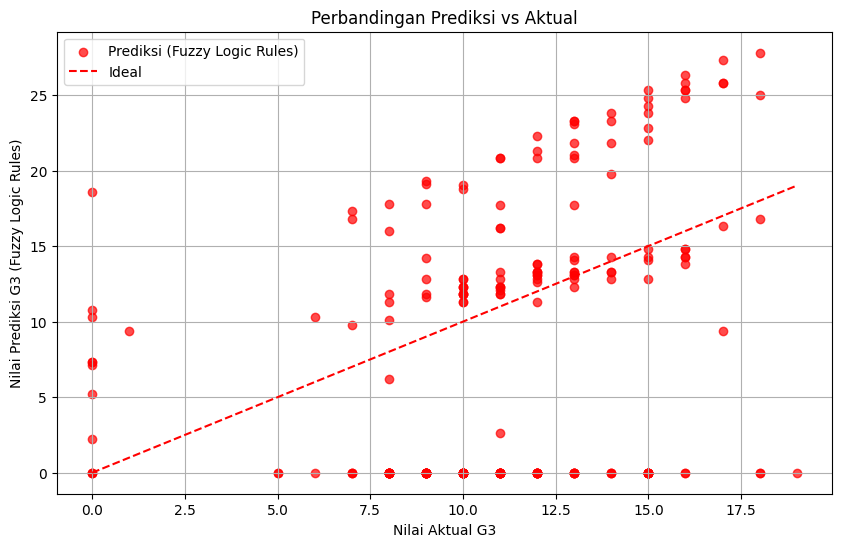

In [388]:
# Visualisasi Prediksi vs Aktual (Fuzzy Logic Rules)
G3_pred = np.array([pred[4] for pred in predictions]) 

plt.figure(figsize=(10, 6))
plt.scatter(Y_test, G3_pred, color='red', alpha=0.7, label='Prediksi (Fuzzy Logic Rules)')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--', label='Ideal')
plt.xlabel('Nilai Aktual G3')
plt.ylabel('Nilai Prediksi G3 (Fuzzy Logic Rules)')
plt.title('Perbandingan Prediksi vs Aktual')
plt.legend()
plt.grid(True)
plt.show()

In [389]:
# Konversi hasil ke dalam bentuk data tabular
table = pd.DataFrame(predictions, columns=['G2', 'Medu', 'studytime', 'Dalc', 'Prediksi G3'])

table.head(10)

,G2,Medu,studytime,Dalc,Prediksi G3
0,10,3,1,5,0.0
1,8,4,1,2,0.0
2,13,1,2,1,0.0
3,11,4,2,1,20.8
4,12,3,3,1,13.8
5,12,3,1,2,17.7
6,6,2,1,1,0.0
7,11,2,2,1,12.3
8,14,1,3,1,22.0
9,13,4,3,1,23.3


In [390]:
table[table['Prediksi G3'] == 0] #.shape[0]

,G2,Medu,studytime,Dalc,Prediksi G3
0,10,3,1,5,0.0
1,8,4,1,2,0.0
2,13,1,2,1,0.0
6,6,2,1,1,0.0
12,7,3,1,1,0.0
...,...,...,...,...,...
197,9,1,2,1,0.0
200,8,1,1,1,0.0
201,15,3,1,1,0.0
206,13,1,1,1,0.0


# **Particle Swarm Optimization (PSO)**

### **Fungsi Objektif untuk PSO**
Fungsi objektif akan mengukur kesalahan antara nilai prediksi (`G3_pred`) dan nilai aktual (`G3_actual`). Biasanya menggunakan **Mean Squared Error (MSE)**:

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^n (G3_{pred_i} - G3_{actual_i})^2
$$

In [391]:
# Fungsi Objektif untuk PSO (Mean Squared Error)
def objective_function(weights):
    G3_pred = np.dot(X_train, weights[:4]) - weights[4]  # Prediksi G3
    mse = np.mean((G3_pred - Y_train) ** 2)
    return mse

In [392]:
# PSO Optimasi Parameter
n_particles = 20
n_dimensions = 5
max_iter = 500
w = 0.5
c1 = 1.5
c2 = 2.0

In [393]:
positions = np.random.uniform(-1, 1, (n_particles, n_dimensions))
velocities = np.random.uniform(-0.1, 0.1, (n_particles, n_dimensions))
personal_best_positions = positions.copy()
personal_best_scores = np.full(n_particles, np.inf)
global_best_position = None
global_best_score = np.inf

In [394]:
for iteration in range(max_iter):
    for i in range(n_particles):
        fitness = objective_function(positions[i])
        if fitness < personal_best_scores[i]:
            personal_best_scores[i] = fitness
            personal_best_positions[i] = positions[i]
        if fitness < global_best_score:
            global_best_score = fitness
            global_best_position = positions[i]
    for i in range(n_particles):
        r1, r2 = np.random.rand(), np.random.rand()
        cognitive = c1 * r1 * (personal_best_positions[i] - positions[i])
        social = c2 * r2 * (global_best_position - positions[i])
        velocities[i] = w * velocities[i] + cognitive + social
        positions[i] += velocities[i]
    print(f"Iterasi {iteration + 1}, Best Score: {global_best_score:.4f}")

print("\nHasil Optimasi PSO:")
print("Bobot Optimal (w1, w2, w3, w4):", global_best_position[:4])
print("Bias Optimal (c):", global_best_position[4])

Iterasi 1, Best Score: 9.3958
Iterasi 2, Best Score: 7.0575
Iterasi 3, Best Score: 7.0575
Iterasi 4, Best Score: 6.8692
Iterasi 5, Best Score: 4.4417
Iterasi 6, Best Score: 4.4417
Iterasi 7, Best Score: 3.1671
Iterasi 8, Best Score: 3.1671
Iterasi 9, Best Score: 3.1671
Iterasi 10, Best Score: 3.0680
Iterasi 11, Best Score: 3.0133
Iterasi 12, Best Score: 3.0133
Iterasi 13, Best Score: 2.8644
Iterasi 14, Best Score: 2.8644
Iterasi 15, Best Score: 2.7434
Iterasi 16, Best Score: 2.7434
Iterasi 17, Best Score: 2.7434
Iterasi 18, Best Score: 2.7044
Iterasi 19, Best Score: 2.6558
Iterasi 20, Best Score: 2.5111
Iterasi 21, Best Score: 2.5111
Iterasi 22, Best Score: 2.5111
Iterasi 23, Best Score: 2.5111
Iterasi 24, Best Score: 2.5041
Iterasi 25, Best Score: 2.5041
Iterasi 26, Best Score: 2.5041
Iterasi 27, Best Score: 2.5031
Iterasi 28, Best Score: 2.4921
Iterasi 29, Best Score: 2.4910
Iterasi 30, Best Score: 2.4910
Iterasi 31, Best Score: 2.4910
Iterasi 32, Best Score: 2.4910
Iterasi 33, Best 


### **Defuzzifikasi (Metode Sugeno)**  
**Rumus Defuzzifikasi untuk $G3$** (menggunakan bobot dan bias optimal dari **PSO**):  
$$
G3 = w_1 \cdot G2 + w_2 \cdot Medu + w_3 \cdot studytime - w_4 \cdot Dalc + c
$$

**Keterangan:**  
- $w_1, w_2, w_3, w_4$: Bobot optimal yang diperoleh dari PSO (Particle Swarm Optimization).
- $\text{G2, Medu, studytime, Dalc}$: Variabel input.
- $c$: Bias atau konstanta.

In [395]:
# Fuzzy Logic Sugeno Prediction
def fuzzy_predict(G2, Medu, studytime, Dalc, weights):
    w1, w2, w3, w4, c = weights
    return w1 * G2 + w2 * Medu + w3 * studytime - w4 * Dalc + c

# Evaluasi dengan Fuzzy Logic
G3_test_pred_fuzzy = []
for i in range(len(X_test)):
    G3_test_pred_fuzzy.append(fuzzy_predict(X_test[i, 0],  # G2
                                            X_test[i, 1],  # Medu
                                            X_test[i, 2],  # studytime
                                            X_test[i, 3],  # Dalc
                                            global_best_position))  # PSO weights


Evaluasi Model Fuzzy Logic Sugeno:
MSE: 3.1612


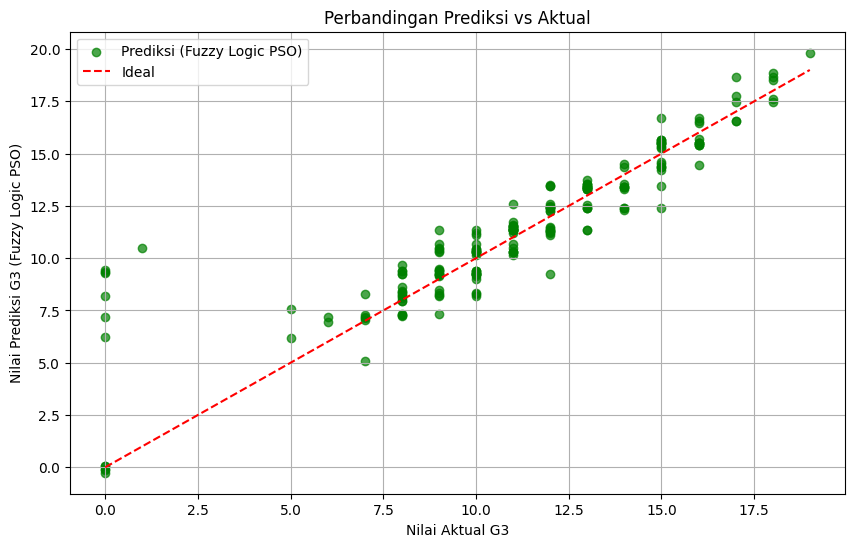

In [396]:
# Evaluasi Prediksi Fuzzy Logic
mse_fuzzy = np.mean((np.array(G3_test_pred_fuzzy) - Y_test) ** 2)

print("\nEvaluasi Model Fuzzy Logic Sugeno:")
print(f"MSE: {mse_fuzzy:.4f}")

# Visualisasi Prediksi vs Aktual (Fuzzy Logic PSO)
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, G3_test_pred_fuzzy, color='green', alpha=0.7, label='Prediksi (Fuzzy Logic PSO)')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--', label='Ideal')
plt.xlabel('Nilai Aktual G3')
plt.ylabel('Nilai Prediksi G3 (Fuzzy Logic PSO)')
plt.title('Perbandingan Prediksi vs Aktual')
plt.legend()
plt.grid(True)
plt.show()

In [397]:
# Konversi hasil ke dalam bentuk data tabular
data_predict = np.hstack((X_test, np.array(G3_test_pred_fuzzy).reshape(-1, 1)))
table2 = pd.DataFrame(data_predict, columns=['G2', 'Medu', 'studytime', 'Dalc', 'Prediksi G3'])

table2.head(10)

,G2,Medu,studytime,Dalc,Prediksi G3
0,10.0,3.0,1.0,5.0,10.688754
1,8.0,4.0,1.0,2.0,8.413125
2,13.0,1.0,2.0,1.0,13.418158
3,11.0,4.0,2.0,1.0,11.353864
4,12.0,3.0,3.0,1.0,12.265737
5,12.0,3.0,1.0,2.0,12.579231
6,6.0,2.0,1.0,1.0,6.245870
7,11.0,2.0,2.0,1.0,11.338856
8,14.0,1.0,3.0,1.0,14.337534
9,13.0,4.0,3.0,1.0,13.316643


In [398]:
table2[table2['Prediksi G3'] < 1] #.shape[0]

,G2,Medu,studytime,Dalc,Prediksi G3
23,0.0,2.0,3.0,1.0,-0.262597
91,0.0,2.0,1.0,2.0,0.050897
134,0.0,3.0,2.0,2.0,-0.065625
196,0.0,3.0,2.0,1.0,-0.131068
202,0.0,1.0,2.0,4.0,0.050253


# **Kesimpulan**

Dari grafik Perbandingan Prediksi vs Aktual yang ditampilkan, berikut adalah beberapa kesimpulan yang dapat diambil:

1. **Performa Fuzzy Logic Sugeno (Bobot dengan Rules Manual):**
   - Prediksi fuzzy logic menggunakan bobot manual masih memiliki penyimpangan yang cukup besar terhadap nilai aktual $\text{G3}$.
   - Beberapa data prediksi memiliki error yang signifikan, terutama pada nilai $\text{G3}$ yang lebih rendah atau lebih tinggi.
   - Hal ini mengindikasikan bahwa aturan fuzzy manual belum cukup optimal untuk mencerminkan hubungan antar fitur $\text{G2, Medu, studytime, dan Dalc}$ dengan nilai $\text{G3}$.

2. **Performa Fuzzy Logic Sugeno (Bobot dengan PSO):**
   - Prediksi fuzzy logic dengan optimasi PSO memiliki performa yang jauh lebih baik.
   - Hasil prediksi mendekati garis ideal (garis merah putus-putus), yang menunjukkan bahwa nilai prediksi $\text{G3}$ sangat dekat dengan nilai aktual.
   - Optimasi bobot dengan PSO mampu menangkap pola hubungan antar fitur dengan lebih baik dibandingkan dengan aturan manual.

3. **Kesimpulan Utama:**
   - **Fuzzy logic dengan PSO memberikan hasil prediksi yang lebih akurat dibandingkan dengan fuzzy logic berbasis aturan manual.**
   - **PSO membantu menyesuaikan bobot dalam model Sugeno sehingga meningkatkan kemampuan prediksi dan meminimalkan error.**
   - Dengan hasil ini, dapat disimpulkan bahwa optimasi model fuzzy logic dengan PSO adalah pendekatan yang lebih efektif untuk memprediksi performa akademik siswa $\text{G3}$ dibandingkan hanya menggunakan aturan manual.